In [1]:
"""
how ot change data types in variables
    df['col_name'] = df['col_name'].astype(int)

"""
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

import missingno as msno 

dashes = dashes='---'*20

In [2]:
data = pd.read_csv('data/titanic.csv')

In [3]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
drop_cols = ['PassengerId','Name','Ticket','Cabin']
data.drop(columns=drop_cols,axis=1, inplace=True)
data.head(2)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C


In [5]:
#convert sex column to binary encoding
#dictionary t oreplace values
data['Sex'] = data['Sex'].map({'male':0,'female':1})
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.0,1,0,7.2500,S
1,1,1,1,38.0,1,0,71.2833,C
2,1,3,1,26.0,0,0,7.9250,S
3,1,1,1,35.0,1,0,53.1000,S
4,0,3,0,35.0,0,0,8.0500,S


In [6]:
data['Age'].value_counts()

24.00    30
22.00    27
18.00    26
19.00    25
30.00    25
         ..
55.50     1
70.50     1
66.00     1
23.50     1
0.42      1
Name: Age, Length: 88, dtype: int64

In [7]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.0,1,0,7.2500,S
1,1,1,1,38.0,1,0,71.2833,C
2,1,3,1,26.0,0,0,7.9250,S
3,1,1,1,35.0,1,0,53.1000,S
4,0,3,0,35.0,0,0,8.0500,S


## EDA
### Target

0    549
1    342
Name: Survived, dtype: int64


0    0.616162
1    0.383838
Name: Survived, dtype: float64
---------------------------------------------


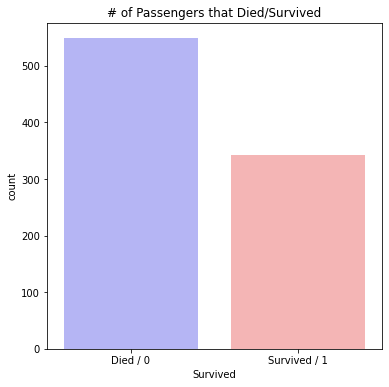

In [8]:
"""
def create_boxplot(df):
    fig, ax = plt.subplots()
    # build a box plot
    ax.boxplot(df)

    # title and axis labels
    ax.set_title('box plot')
    ax.set_xlabel('x-axis')
    ax.set_ylabel('y-axis')
    #xticklabels=['category 1', 'category 2', 'category 3', 'category 4']
    #ax.set_xticklabels(xticklabels)


    # add horizontal grid lines
    ax.yaxis.grid(True)


"""
def count_plot(dataframe,target, ocol,lcol):
    print(dataframe[target].value_counts())
    print('\n')
    print(dataframe[target].value_counts(normalize=True))
    dashes = dashes='---'*15
    print(dashes)
    
    fig,ax = plt.subplots(figsize=(6,6))
    #fig.figsize=[5,5]
    sns.countplot(x=target, data=dataframe, palette="bwr")
    ax.set_title(f'# of Passengers that {ocol}/{lcol}')
    ax.set_xticklabels(['Died / 0', 'Survived / 1'])
    plt.show()
    return ax

#executing with arguments
#,ocol='Died',lcol='Survived'
axer = count_plot(dataframe=data,target='Survived',ocol='Died',lcol='Survived');
#type(ax)

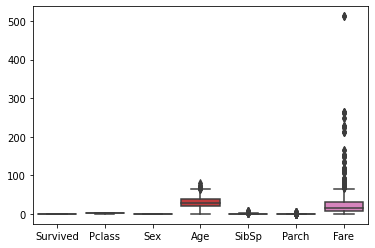

In [9]:
def count_plot(df):
    
    fig,ax = plt.subplots(figsize=(8,8,))
    fig.figsize=[7,8]
    sns.boxplot(data=df, palette="bwr")
    ax.set_title('Boxplot')
    #ax.set_xticklabels(['Died / 0', 'Survived / 1'])
    plt.show()
    return ax
sns.boxplot(data=data);

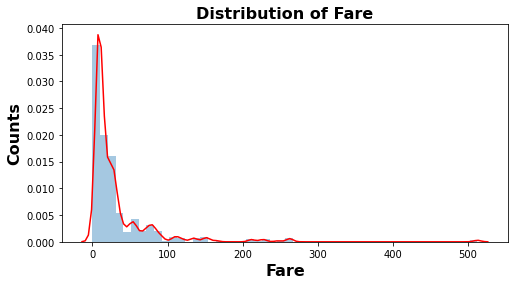

In [10]:
#fare


def distribution_visualization(df,col = 'Fare',hist_kws=None, kde_kws={'color':'red'}, figsize=(8,4)):
    """
    plots a seaborn distplot for column w/customization
    Args
    df (df)
    col (int)
    hist_kws (dict)
    figsize (dict)
    
    """
    if hist_kws == None:
        {'alpha':0.5,'edgecolor':'black'}
    
    fig,ax = plt.subplots(figsize=figsize)
    sns.distplot(data[col], hist_kws= hist_kws,ax=ax, kde_kws=kde_kws)

    label_font = {'weight':'bold','size':16}
    ax.set_ylabel('Counts',fontdict=label_font)
    ax.set_xlabel(col,fontdict=label_font)
    ax.set_title(f'Distribution of {col.title()}',fontdict=label_font)

distribution_visualization(data)

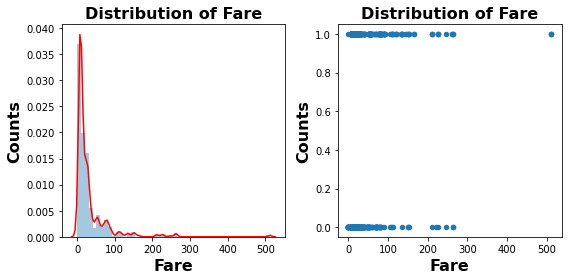

In [11]:
def distribution_visualization(df,col = 'Fare',target='Survived',hist_kws=None, kde_kws={'color':'red'}, figsize=(8,4)):
    """
    plots a seaborn distplot for column w/customization
    Args
    df (df)
    col (int)
    hist_kws (dict)
    figsize (dict)
    
    """
    if hist_kws == None:
        {'alpha':0.5,'edgecolor':'black'}
    
    fig,ax = plt.subplots(ncols=2, figsize=figsize)
    sns.distplot(data[col], hist_kws= hist_kws,ax=ax[0], kde_kws=kde_kws)
    df.plot(kind='scatter',x=col, y=target, ax=ax[1])

    label_font = {'weight':'bold','size':16}
    
    ax_list = ax
    for ax in ax_list:
        ax.set_ylabel('Counts',fontdict=label_font)
        ax.set_xlabel(col,fontdict=label_font)
        ax.set_title(f'Distribution of {col.title()}',fontdict=label_font)
    plt.tight_layout() 
    
    return fig, ax

fig, ax = distribution_visualization(data)

### Null Values

In [12]:
# total = train_df.isnull().sum().sort_values(ascending=False)
# percent_1 = train_df.isnull().sum()/train_df.isnull().count()*100
# percent_2 = (round(percent_1, 1)).sort_values(ascending=False)
# missing_data = pd.concat([total, percent_2], axis=1, keys=['Total', '%'])
# missing_data.head(5)

In [13]:
def unique_values(df):
    info_df = df.info()
    print(dashes)
    print('\n')
    num_unique = df.nunique()
    print("Number of uniques values in each Feature:")
    
    return num_unique

unique_values(data)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Sex         891 non-null int64
Age         714 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Fare        891 non-null float64
Embarked    889 non-null object
dtypes: float64(2), int64(5), object(1)
memory usage: 55.8+ KB
------------------------------------------------------------


Number of uniques values in each Feature:


Survived      2
Pclass        3
Sex           2
Age          88
SibSp         7
Parch         7
Fare        248
Embarked      3
dtype: int64

In [14]:
def nan_more_fifty(df): 
    for column in df:
        if df[column].isnull().sum()*100.0/df.shape[0] > 50:
            df.drop(column,1, inplace=True)
        #else:
    print('There are no columns with 50% null values')
    return df        


In [15]:
revised = nan_more_fifty(data)

There are no columns with 50% null values


Index(['Age', 'Embarked'], dtype='object')


Age         177
Embarked      2
dtype: int64

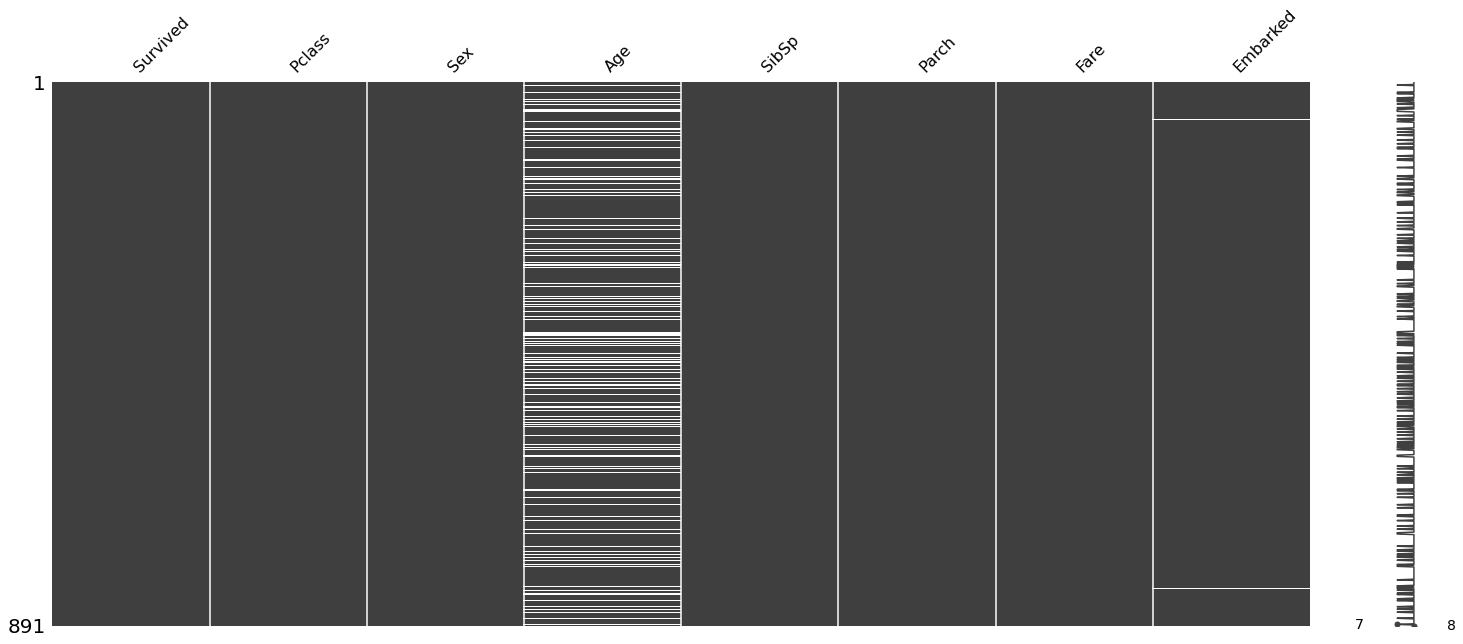

In [16]:
def count_null(df):
    #only features w/null values
    null_columns=df.columns[df.isnull().any()]
    test = df[null_columns].isnull().sum()
    if test.empty:
        print('No nulls')
    else:
        print(null_columns)
    
    # Visualize missing values as a matrix 
    msno.matrix(df) 
    
    return test
    
count_null(data)  

### Train Test Split

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
y = data['Survived'].copy()
X = data[['Pclass','Sex','SibSp','Age','Parch','Fare','Embarked']]

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.25, random_state=42)

In [20]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(668, 7)
(668,)
(223, 7)
(223,)


In [21]:
X_train.head()

,Pclass,Sex,SibSp,Age,Parch,Fare,Embarked
298,1,0,0,NaN,0,30.5000,S
884,3,0,0,25.00,0,7.0500,S
247,2,1,0,24.00,2,14.5000,S
478,3,0,0,22.00,0,7.5208,S
305,1,0,1,0.92,2,151.5500,S


In [22]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 668 entries, 298 to 102
Data columns (total 7 columns):
Pclass      668 non-null int64
Sex         668 non-null int64
SibSp       668 non-null int64
Age         536 non-null float64
Parch       668 non-null int64
Fare        668 non-null float64
Embarked    666 non-null object
dtypes: float64(2), int64(4), object(1)
memory usage: 41.8+ KB


In [23]:
"""
df= df.dropna(subset='Embarked')

"""
from sklearn.impute import SimpleImputer

def remake(X_train_cln,X_train):
       return pd.DataFrame(X_train_cln,columns=X_train.columns, index=X_train.index)

def impute(X_train, X_test):
    imputer = SimpleImputer(strategy='most_frequent')
    X_train_cln = remake(imputer.fit_transform(X_train), X_train) #remake function
    X_test_cln = remake(imputer.transform(X_test ), X_test)
    X_test_cln
    #X_train_cln = X_train_cln.astype(float)
    #X_test_cln = X_test_cln.astype(float)
    
    return X_train_cln, X_test_cln

In [24]:
X_train_cln, X_test_cln = impute(X_train,X_test)
X_train_cln

,Pclass,Sex,SibSp,Age,Parch,Fare,Embarked
298,1,0,0,24,0,30.5,S
884,3,0,0,25,0,7.05,S
247,2,1,0,24,2,14.5,S
478,3,0,0,22,0,7.5208,S
305,1,0,1,0.92,2,151.55,S
...,...,...,...,...,...,...,...
106,3,1,0,21,0,7.65,S
270,1,0,0,24,0,31,S
860,3,0,2,41,0,14.1083,S
435,1,1,1,14,2,120,S


In [25]:
X_train_cln.isna().sum()

Pclass      0
Sex         0
SibSp       0
Age         0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [26]:
X_train_cln.Age.value_counts()

24.00    156
22.00     23
28.00     21
25.00     19
18.00     19
        ... 
65.00      1
61.00      1
57.00      1
34.50      1
0.92       1
Name: Age, Length: 82, dtype: int64

In [27]:
X_train_cln.Age.value_counts()

24.00    156
22.00     23
28.00     21
25.00     19
18.00     19
        ... 
65.00      1
61.00      1
57.00      1
34.50      1
0.92       1
Name: Age, Length: 82, dtype: int64

In [28]:
X_train_cln.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 668 entries, 298 to 102
Data columns (total 7 columns):
Pclass      668 non-null object
Sex         668 non-null object
SibSp       668 non-null object
Age         668 non-null object
Parch       668 non-null object
Fare        668 non-null object
Embarked    668 non-null object
dtypes: object(7)
memory usage: 41.8+ KB


### One Hot Encode Categoricals

In [29]:
"""
#columns=['Embarked','cvf','cvbn']

cols = ['Embarked']
one_hot_train = pd.get_dummies(testor, columns=cols, drop_first=True)
one_hot_train.head()
"""
cols_hot = ['Embarked']
def one_hot(df_train, df_test, columns=cols_hot):
    one_hot_train = pd.get_dummies(df_train, columns=cols_hot, drop_first=True)
    one_hot_test = pd.get_dummies(df_test, columns=cols_hot, drop_first=True)
    
    return one_hot_train, one_hot_test

In [30]:
one_hot_train_cln, one_hot_test_cln = one_hot(X_train_cln, X_test_cln, cols_hot)

In [31]:
one_hot_train_cln

,Pclass,Sex,SibSp,Age,Parch,Fare,Embarked_Q,Embarked_S
298,1,0,0,24,0,30.5,0,1
884,3,0,0,25,0,7.05,0,1
247,2,1,0,24,2,14.5,0,1
478,3,0,0,22,0,7.5208,0,1
305,1,0,1,0.92,2,151.55,0,1
...,...,...,...,...,...,...,...,...
106,3,1,0,21,0,7.65,0,1
270,1,0,0,24,0,31,0,1
860,3,0,2,41,0,14.1083,0,1
435,1,1,1,14,2,120,0,1


In [32]:
one_hot_test_cln

,Pclass,Sex,SibSp,Age,Parch,Fare,Embarked_Q,Embarked_S
709,3,0,1,24,1,15.2458,0,0
439,2,0,0,31,0,10.5,0,1
840,3,0,0,20,0,7.925,0,1
720,2,1,0,6,1,33,0,1
39,3,1,1,14,0,11.2417,0,0
...,...,...,...,...,...,...,...,...
880,2,1,0,25,1,26,0,1
425,3,0,0,24,0,7.25,0,1
101,3,0,0,24,0,7.8958,0,1
199,2,1,0,24,0,13,0,1


In [33]:
one_hot_train_cln.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 668 entries, 298 to 102
Data columns (total 8 columns):
Pclass        668 non-null object
Sex           668 non-null object
SibSp         668 non-null object
Age           668 non-null object
Parch         668 non-null object
Fare          668 non-null object
Embarked_Q    668 non-null uint8
Embarked_S    668 non-null uint8
dtypes: object(6), uint8(2)
memory usage: 37.8+ KB


In [34]:
X_train_int = one_hot_train_cln.copy()
X_test_int = one_hot_test_cln.copy()

In [35]:
X_train_int = X_train_int.astype(float)
X_test_int = X_test_int.astype(float)

In [36]:
X_train_int.head()

,Pclass,Sex,SibSp,Age,Parch,Fare,Embarked_Q,Embarked_S
298,1.0,0.0,0.0,24.00,0.0,30.5000,0.0,1.0
884,3.0,0.0,0.0,25.00,0.0,7.0500,0.0,1.0
247,2.0,1.0,0.0,24.00,2.0,14.5000,0.0,1.0
478,3.0,0.0,0.0,22.00,0.0,7.5208,0.0,1.0
305,1.0,0.0,1.0,0.92,2.0,151.5500,0.0,1.0


In [37]:
X_train_int.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 668 entries, 298 to 102
Data columns (total 8 columns):
Pclass        668 non-null float64
Sex           668 non-null float64
SibSp         668 non-null float64
Age           668 non-null float64
Parch         668 non-null float64
Fare          668 non-null float64
Embarked_Q    668 non-null float64
Embarked_S    668 non-null float64
dtypes: float64(8)
memory usage: 47.0 KB


### Scale Data

In [38]:
from sklearn.preprocessing import StandardScaler

In [39]:
def scale_data(sscaler, X_train_int, X_test_int,y_train):
    #scaler = sscaler
    #transform the training and test sets
    scaled_data_train = sscaler.fit_transform(X_train_int, y_train)
    scaled_data_test = sscaler.transform(X_test_int)
    #convert into a dataframe
    scaled_df_train = pd.DataFrame(scaled_data_train, columns=X_train_int.columns)
    scaled_df_test = pd.DataFrame(scaled_data_test, columns=X_test_int.columns)
    
    return scaled_df_train, scaled_df_test

In [40]:
train_scale, test_scale = scale_data(StandardScaler(), X_train_int, X_test_int,y_train)

In [41]:
train_scale

,Pclass,Sex,SibSp,Age,Parch,Fare,Embarked_Q,Embarked_S
0,-1.620517,-0.722247,-0.467660,-0.330106,-0.468878,-0.032568,-0.308354,0.595793
1,0.809349,-0.722247,-0.467660,-0.254221,-0.468878,-0.487331,-0.308354,0.595793
2,-0.405584,1.384569,-0.467660,-0.330106,2.046870,-0.342854,-0.308354,0.595793
3,0.809349,-0.722247,-0.467660,-0.481877,-0.468878,-0.478201,-0.308354,0.595793
4,-1.620517,-0.722247,0.376656,-2.081540,2.046870,2.314937,-0.308354,0.595793
...,...,...,...,...,...,...,...,...
663,0.809349,1.384569,-0.467660,-0.557762,-0.468878,-0.475695,-0.308354,0.595793
664,-1.620517,-0.722247,-0.467660,-0.330106,-0.468878,-0.022872,-0.308354,0.595793
665,0.809349,-0.722247,1.220971,0.959945,-0.468878,-0.350450,-0.308354,0.595793
666,-1.620517,1.384569,0.376656,-1.088960,2.046870,1.703093,-0.308354,0.595793


In [42]:
test_scale

,Pclass,Sex,SibSp,Age,Parch,Fare,Embarked_Q,Embarked_S
0,0.809349,-0.722247,0.376656,-0.330106,0.788996,-0.328391,-0.308354,-1.678435
1,-0.405584,-0.722247,-0.467660,0.201092,-0.468878,-0.420425,-0.308354,0.595793
2,0.809349,-0.722247,-0.467660,-0.633647,-0.468878,-0.470362,-0.308354,0.595793
3,-0.405584,1.384569,-0.467660,-1.696043,0.788996,0.015914,-0.308354,0.595793
4,0.809349,1.384569,0.376656,-1.088960,-0.468878,-0.406042,-0.308354,-1.678435
...,...,...,...,...,...,...,...,...
218,-0.405584,1.384569,-0.467660,-0.254221,0.788996,-0.119836,-0.308354,0.595793
219,0.809349,-0.722247,-0.467660,-0.330106,-0.468878,-0.483452,-0.308354,0.595793
220,0.809349,-0.722247,-0.467660,-0.330106,-0.468878,-0.470928,-0.308354,0.595793
221,-0.405584,1.384569,-0.467660,-0.330106,-0.468878,-0.371943,-0.308354,0.595793


In [43]:
from sklearn.linear_model import LogisticRegression

from sklearn import metrics
from sklearn.metrics import accuracy_score

### Imbalance

In [44]:
from imblearn.over_sampling import SMOTE

In [45]:
def smote_resample(y, X_train, y_train):
    # Previous original class distribution
    print('Original class distribution: \n')
    print(y.value_counts())
    smote = SMOTE()
    X_train_resampled, y_train_resampled = smote.fit_sample(X_train, y_train) 
    # Preview synthetic sample class distribution
    print('-----------------------------------------')
    print('Synthetic sample class distribution: \n')
    print(pd.Series(y_train_resampled).value_counts()) 
    
    return X_train_resampled, y_train_resampled

In [46]:
train_resampled, y_train_resampled = smote_resample(y, train_scale, y_train)

Original class distribution: 

0    549
1    342
Name: Survived, dtype: int64
-----------------------------------------
Synthetic sample class distribution: 

1    415
0    415
Name: Survived, dtype: int64


In [47]:
# """
# we can use false posirve rate and true postive rate to show us how good our model is.
# 45 degree line is a worthless model

# y_score - between scale of 1 and 0
# """
# logreg = LogisticRegression()
# logreg.fit(train_scale, y_train)
#         # Generate predictions
# y_hat_train = logreg.predict(train_scale)
# y_hat_test =  logreg.predict(test_scale)

# y_score = logreg.decision_function(test_scale)
# y_score_proba = logreg.predict_proba(test_scale)

# fpr, tpr,thresh  = metrics.roc_curve(y_test,y_score)
# metrics.auc(fpr,tpr)

In [48]:
#y_score.shape

In [49]:
"""
y_score has values that aren't probability

how hte model makes its predicitons
gives us a probability of calling each class back.  
Gives us a value that correspondes to each row in data set
for each observation or row, we have hte probaiblity of falling into 0 or falling into 1
when we want to get roc curve we can just take probility of falling into 1 class and pass that in 
"""
#print(y_score_proba)

"\ny_score has values that aren't probability\n\nhow hte model makes its predicitons\ngives us a probability of calling each class back.  \nGives us a value that correspondes to each row in data set\nfor each observation or row, we have hte probaiblity of falling into 0 or falling into 1\nwhen we want to get roc curve we can just take probility of falling into 1 class and pass that in \n"

In [50]:
# fig,ax = plt.subplots()

# #ax = axes[0]
# #plot fpr v. tpr
# ax.plot(fpr,tpr,label=f'ROC AUC Curve= {round(metrics.auc(fpr,tpr),2)}')
# ax.plot([0,1],[0,1],ls=':')
# ax.set(xlabel='False Positive Rate',ylabel='True Positive Rate')
# ax.legend()
# ax.grid()

# #ax = axes[1]

In [51]:
# curve = metrics.plot_roc_curve(logreg, test_scale,y_test)
# ax = curve.ax_
# ax.legend()
# ax.plot([0,1],[0,1],ls=':')
# ax.grid()

### Classification Model Evaluation

notes<br>
recall-How good is our model at finding people who survived. Of postive class, what percentage did we find.<br>

In [52]:
from sklearn.linear_model import LogisticRegression

from sklearn import metrics
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score,auc
from sklearn.metrics import recall_score

In [53]:
def eval_classification_model(class_model, X_train,X_test, y_train, classes,
                              normalize='true',cmap='Blues',figsize=[10,5]):
    #Classification Model, ie, knn = LogisticRegression()
    class_model.fit(X_train, y_train)
    # get Predictions
    y_hat_train = class_model.predict(X_train)
    y_hat_test =  class_model.predict(X_test)
    #evaluate our model
    print("Training Accuracy on  Model: {}".format(accuracy_score(y_train, y_hat_train)))
    print("Testing Accuracy on  Model: {}".format(accuracy_score(y_test, y_hat_test)))
    print('Recall: {}'.format(recall_score(y_test, y_hat_test)))
    
    print('\n')
    
    # Classification Report / Accuracy Score 
    #dashes = '---'*20
    print(dashes)
    print("Classification Report")
    print(dashes)
    #classes = ['Died','Survived']
    print(metrics.classification_report(y_test,y_hat_test,
                                        target_names=classes))
    print(dashes)
    print('\n')

    fig, axes = plt.subplots(ncols=2,figsize= figsize)
    #Confusion Matrix
    metrics.plot_confusion_matrix(class_model,X_test,y_test,normalize=normalize,
                                  cmap=cmap, ax=axes[0])
    #ROC-AUC Curve
    metrics.plot_roc_curve(class_model, X_test,y_test,ax=axes[1])
    ax = axes[1]
    ax.legend()
    ax.plot([0,1],[0,1],ls=':')
    ax.grid()
    
    #return y_hat_train, y_hat_test
    return class_model

Training Accuracy on  Model: 0.7662650602409639
Testing Accuracy on  Model: 0.8026905829596412
Recall: 0.797752808988764


------------------------------------------------------------
Classification Report
------------------------------------------------------------
              precision    recall  f1-score   support

        Died       0.86      0.81      0.83       134
    Survived       0.73      0.80      0.76        89

    accuracy                           0.80       223
   macro avg       0.79      0.80      0.80       223
weighted avg       0.81      0.80      0.80       223

------------------------------------------------------------




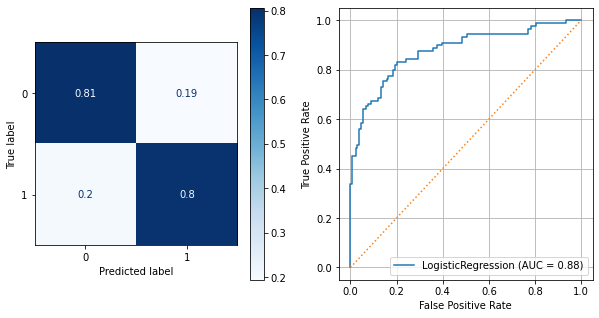

In [54]:
model = eval_classification_model(LogisticRegression(), train_resampled, test_scale, 
                                  y_train_resampled,classes=['Died','Survived'])

### GridSearch

In [55]:
"""
C_param_range = [0.005, 0.1, 0.2, 0.5, 0.8, 1, 1.25, 1.5, 2]
names = [0.005, 0.1, 0.2, 0.5, 0.8, 1, 1.25, 1.5, 2]

"""
from sklearn.model_selection import GridSearchCV

model = LogisticRegression()
params = {'C':[0.001, 0.01, 0.1, 1,10, 100]}
gridsearch = GridSearchCV(model,params, scoring='recall')

In [56]:
gridsearch.fit(train_scale, y_train)

GridSearchCV(estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100]},
             scoring='recall')

In [57]:
#of all params it tried thi gave it hte highest score
best_params = gridsearch.best_params_
#best_params

In [58]:
#this is hte actual model it trained
best_model = gridsearch.best_estimator_

Training Accuracy on  Model: 0.7994011976047904
Testing Accuracy on  Model: 0.8071748878923767
Recall: 0.7303370786516854


------------------------------------------------------------
Classification Report
------------------------------------------------------------
              precision    recall  f1-score   support

        Died       0.83      0.86      0.84       134
    Survived       0.77      0.73      0.75        89

    accuracy                           0.81       223
   macro avg       0.80      0.79      0.80       223
weighted avg       0.81      0.81      0.81       223

------------------------------------------------------------




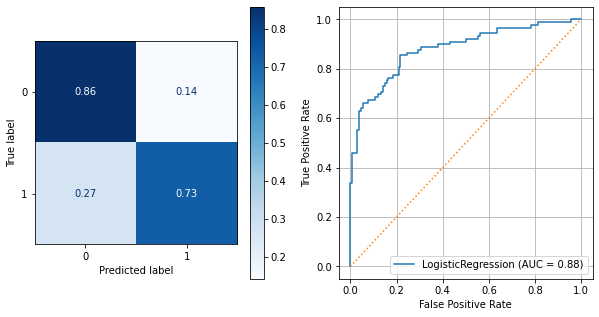

In [59]:
# best_model = LogisticRegression(**best_params)
# best_model.fit(train_scale,y_train)
model = eval_classification_model(best_model,train_scale, test_scale,y_train,classes=['Died','Survived'])

In [60]:
res_df = pd.DataFrame(gridsearch.cv_results_)
res_df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.012812,0.001461,0.006904,0.000449,0.001,{'C': 0.001},0.039216,0.000000,0.058824,0.02,0.02,0.027608,0.019935,6
1,0.013122,0.001101,0.008003,0.001230,0.01,{'C': 0.01},0.490196,0.745098,0.607843,0.46,0.58,0.576627,0.100440,5
2,0.013991,0.000962,0.007606,0.000821,0.1,{'C': 0.1},0.627451,0.764706,0.666667,0.56,0.76,0.675765,0.078517,4
3,0.017191,0.002823,0.008662,0.001925,1,{'C': 1},0.647059,0.784314,0.686275,0.56,0.76,0.687529,0.080650,1
4,0.017534,0.002418,0.007873,0.001216,10,{'C': 10},0.647059,0.784314,0.686275,0.56,0.76,0.687529,0.080650,1
5,0.019024,0.002865,0.010077,0.001878,100,{'C': 100},0.647059,0.784314,0.686275,0.56,0.76,0.687529,0.080650,1


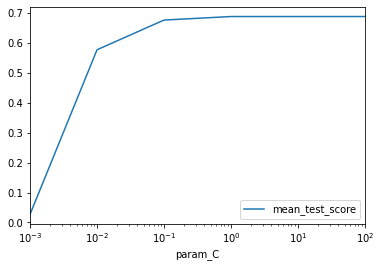

In [61]:
res_df.plot('param_C','mean_test_score', logx=True)

### Logistic Regression with Parameters

Training Accuracy on  Model: 0.7674698795180723
Testing Accuracy on  Model: 0.8026905829596412
Recall: 0.8314606741573034


------------------------------------------------------------
Classification Report
------------------------------------------------------------
              precision    recall  f1-score   support

        Died       0.88      0.78      0.83       134
    Survived       0.72      0.83      0.77        89

    accuracy                           0.80       223
   macro avg       0.80      0.81      0.80       223
weighted avg       0.81      0.80      0.80       223

------------------------------------------------------------




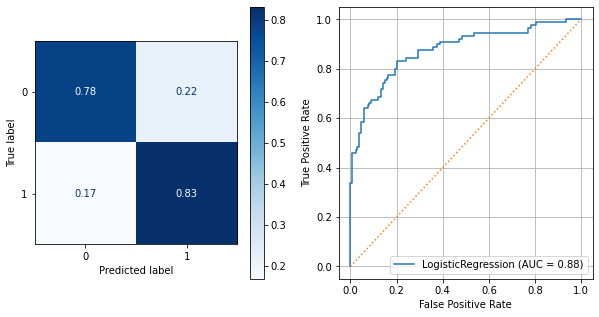

In [62]:
#LogisticRegression(fit_intercept=False, C=1e12, solver='liblinear')
"""
Training Accuracy on  Model: 0.7746987951807229
Testing Accuracy on  Model: 0.7937219730941704

 accuracy                           0.80       223
 
 But, TP increased from 80% to 83%

"""
model = eval_classification_model(LogisticRegression(fit_intercept=False, C=1e12, solver='liblinear'), 
                                                    train_resampled, test_scale, y_train_resampled,classes=['Died','Survived'])

### KNeighbors Nearest Classifier

In [63]:
from sklearn.neighbors import KNeighborsClassifier

Training Accuracy on  Model: 0.8518072289156626
Testing Accuracy on  Model: 0.7488789237668162
Recall: 0.8089887640449438


------------------------------------------------------------
Classification Report
------------------------------------------------------------
              precision    recall  f1-score   support

        Died       0.85      0.71      0.77       134
    Survived       0.65      0.81      0.72        89

    accuracy                           0.75       223
   macro avg       0.75      0.76      0.75       223
weighted avg       0.77      0.75      0.75       223

------------------------------------------------------------




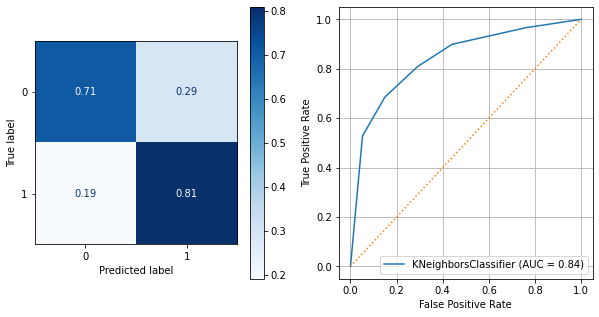

In [64]:
mocel = eval_classification_model(KNeighborsClassifier(), 
                                                    train_resampled, test_scale, y_train_resampled,classes=['Died','Survived'])

In [65]:
from sklearn.model_selection import GridSearchCV

model = KNeighborsClassifier()
params = {'n_neighbors':range(1, 26, 2)}
gridsearch = GridSearchCV(model,params, scoring='recall')
gridsearch.fit(train_scale, y_train)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': range(1, 26, 2)}, scoring='recall')

Training Accuracy on  Model: 0.8819277108433735
Testing Accuracy on  Model: 0.7623318385650224
Recall: 0.7528089887640449


------------------------------------------------------------
Classification Report
------------------------------------------------------------
              precision    recall  f1-score   support

        Died       0.82      0.77      0.80       134
    Survived       0.68      0.75      0.72        89

    accuracy                           0.76       223
   macro avg       0.75      0.76      0.76       223
weighted avg       0.77      0.76      0.76       223

------------------------------------------------------------




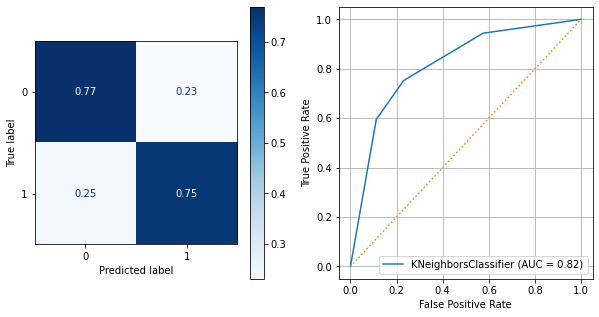

In [66]:
model = eval_classification_model(gridsearch.best_estimator_, 
                                                    train_resampled, test_scale, y_train_resampled,classes=['Died','Survived'])

### Decision Tree Classifier

In [67]:
from sklearn.tree import DecisionTreeClassifier

Training Accuracy on  Model: 0.8325301204819278
Testing Accuracy on  Model: 0.7937219730941704
Recall: 0.6853932584269663


------------------------------------------------------------
Classification Report
------------------------------------------------------------
              precision    recall  f1-score   support

        Died       0.81      0.87      0.83       134
    Survived       0.77      0.69      0.73        89

    accuracy                           0.79       223
   macro avg       0.79      0.78      0.78       223
weighted avg       0.79      0.79      0.79       223

------------------------------------------------------------




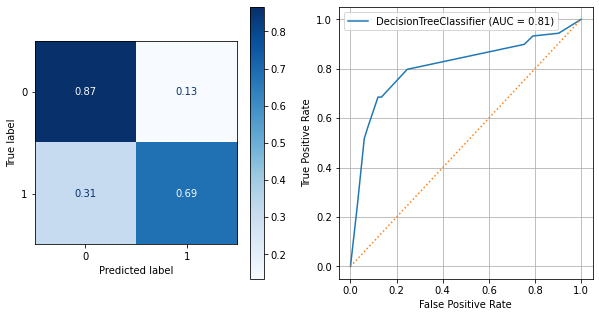

In [68]:
#auc- line, are we better than random chance
tree = tree = eval_classification_model(DecisionTreeClassifier(max_depth=5), 
                                            train_resampled, test_scale, y_train_resampled,classes=['Died','Survived'])

In [69]:
#pulled feature importance from model
tree
df_import = pd.Series(tree.feature_importances_,index=train_resampled.columns, name='Importance')
df_import.sort_values()

Embarked_Q    0.000000
Embarked_S    0.000000
Parch         0.004610
SibSp         0.035560
Fare          0.084588
Pclass        0.142856
Age           0.184661
Sex           0.547725
Name: Importance, dtype: float64

In [70]:
def plot_importance(tree, top_n=10, figsize=(10,10)):
    df_importance = pd.Series(tree.feature_importances_,index=train_resampled.columns)
    df_importance.sort_values(ascending=True).tail(top_n).plot(kind='barh', figsize=figsize)
    
    return df_importance

Pclass        0.142856
Sex           0.547725
SibSp         0.035560
Age           0.184661
Parch         0.004610
Fare          0.084588
Embarked_Q    0.000000
Embarked_S    0.000000
dtype: float64

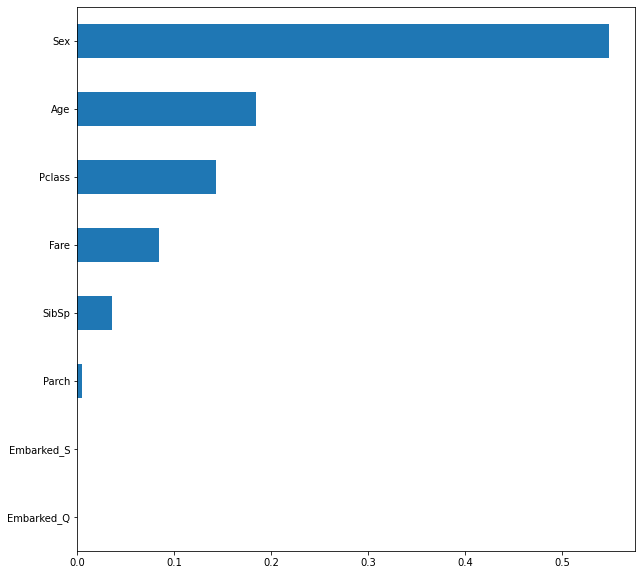

In [71]:
plot_importance(tree)

In [72]:
def ensemble_features(tree, top_n=10, figsize=(10,10)):
    df_importance = pd.Series(tree.feature_importances_,index=train_resampled.columns)
    df_importance.sort_values(ascending=True).tail(top_n).plot(kind='barh', figsize=figsize)
    
    return df_importance
    

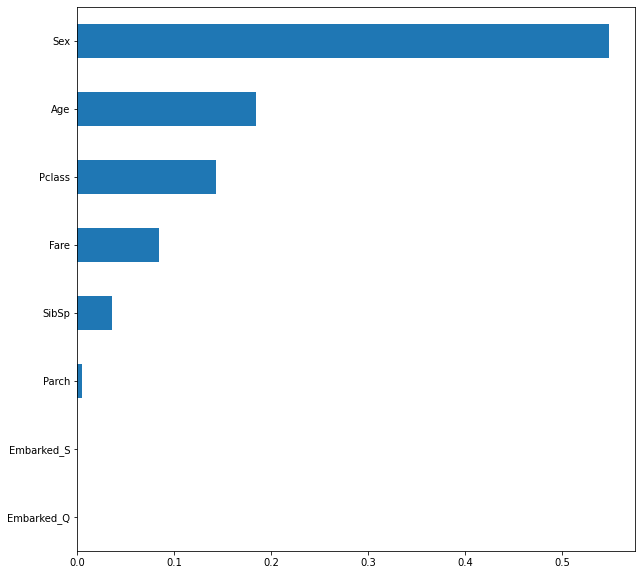

In [73]:
#top 10 imporant features as determined by our model
#what were most important things in determing the output
tree = ensemble_features(tree)

In [74]:
import tzlocal
import datetime as dt#to get current time
tz = tzlocal.get_localzone()
print(tz)
start = dt.datetime.now(tz)
print(start.strftime("%m/%d/%y - %I:%m %p"))

America/New_York
09/13/20 - 10:09 AM


In [75]:
"""
how long model takes ot produce results
tells us when it ended and how long ago
"""
class Timer() :

    def __init__(self, format_="%m/%d/%y - %I:%m %p"): #when we intialize class its going to perform these actions
        import tzlocal
        import datetime as dt#to get current time
        self.tz = tzlocal.get_localzone() #save and can call out whenever we want
        self.fmt = format_
        
        self.created_at =self.get_time()
        
    def get_time(self): 
        import datetime as dt
        return dt.datetime.now(self.tz)
    
    def start(self): #need to get the time
        time = self.get_time()
        self.start= time
        print(f"[i]Timer started at {self.start.strftime(self.fmt)}")
        
    def stop(self):
        time = self.get_time()
        self.end = time
        print(f"[i]Timer ended at {self.end.strftime(self.fmt)}")
        print(f"- Total Time= {self.end - self.start}")
        

In [76]:
timer = Timer()
print(timer.created_at)
timer.start()
#timer.start

2020-09-13 10:05:27.186780-04:00
[i]Timer started at 09/13/20 - 10:09 AM


In [77]:
timer.stop()

[i]Timer ended at 09/13/20 - 10:09 AM
- Total Time= 0:00:00.025512


In [78]:
#model = eval_classification_model(best_model,train_scale, test_scale,y_train,classes=['Died','Survived'])
#grid_clf = GridSearchCV(tree, param_grid)

In [79]:
#set up paragrid

def gridsearch_decisiontree(tree,X_train, y_train):
    #tree= DecisionTreeClassifier()

   
#     #timer.start
    param_grid = {"criterion":["gini",'entropy'],
                 'max_depth':[None,5,3,8,10],
                 'max_features':['auto','sqrt',3,5]}#list of options
    grid_clf = GridSearchCV(tree, param_grid)

    timer = Timer()
#     #print(timer.created_at)
    timer.start()
    
    grid_clf.fit(X_train, y_train)
    #timer.stop()
    timer.stop()
    
    #grid_clf.best_params_
    
    return grid_clf.best_params_

In [80]:
#train_resampled, test_scale, y_train_resampled,
grid_clf = gridsearch_decisiontree( DecisionTreeClassifier(),train_resampled,y_train_resampled)
grid_clf

[i]Timer started at 09/13/20 - 10:09 AM
[i]Timer ended at 09/13/20 - 10:09 AM
- Total Time= 0:00:02.404362


{'criterion': 'entropy', 'max_depth': None, 'max_features': 5}

In [81]:
#grid_clf.best_params_

In [82]:
tree= DecisionTreeClassifier()


#     #print(timer.created_at)

#     #timer.start
param_grid = {"criterion":["gini",'entropy'],
                 'max_depth':[None,5,3,8,10],
                 'max_features':['auto','sqrt',3,5]}#list of options
grid_clf = GridSearchCV(tree, param_grid)


In [83]:
timer = Timer()
timer.start()

grid_clf.fit(train_resampled, y_train_resampled)

timer.stop()

grid_clf.best_params_

[i]Timer started at 09/13/20 - 10:09 AM
[i]Timer ended at 09/13/20 - 10:09 AM
- Total Time= 0:00:02.951722


{'criterion': 'gini', 'max_depth': None, 'max_features': 5}

In [84]:
"""
using Randomized search instead of gridsearch especially for large datasets
create a best model from  best parameteres that this found (from Gridsearch object)

"""
#create a tree w/gridsearches best params
# best_tree = DecisionTreeClassifier(**grid_clf.best_params_)
# best_tree.fit(train_resampled,y_train_resampled)

# #get predicitons for train and test set
# y_hat_test = best_tree.predict(test_scale)
# #DecisionTreeClassifier(max_depth=5),train_resampled, test_scale, y_train_resampled,classes=['Died','Survived'])
# eval_classification_model(best_tree, y_test,y_hat_test,test_scale,classes=['Died','Survived'])

'\nusing Randomized search instead of gridsearch especially for large datasets\ncreate a best model from  best parameteres that this found (from Gridsearch object)\n\n'

### Random Forest

In [85]:
"""
RF-naturally resitant to noise and variance in the data
runtime can be quite slow
"""
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier

In [86]:
# cat_cols = X_train.select_dtypes('O').columns
# cat_cols

In [87]:
# num_cols = X_train.select_dtypes('number').columns
# num_cols

In [88]:
# X_train_obj = X_train.drop(['Pclass','SibSp','Age'],axis=1)
# X_test_obj = X_test.drop(['Pclass','SibSp','Age'], axis=1)

In [89]:
# X_train_num = X_train.drop(['Sex','Embarked'],axis=1)
# X_test_num = X_test.drop(['Sex','Embarked'],axis=1)